In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
happiness2015=pd.read_csv('World_Happiness_2015.csv')

In [31]:
first_5=happiness2015.head()

In [32]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [33]:
first_5


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


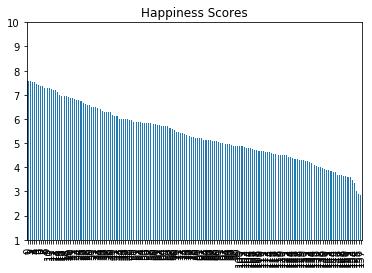

In [34]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(1,10))

## Aggregating into broader groups
1. Split the dataframe into groups.
2. Apply a function to each group.
3. Combine the results into one data structure.

In [35]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [36]:
so_asia=happiness2015[happiness2015['Region']=='Southern Asia']
so_asia

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


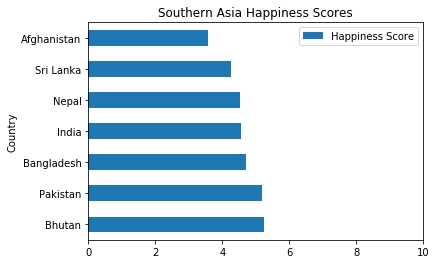

In [37]:
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title = 'Southern Asia Happiness Scores', xlim=(0,10))

In [38]:
mean_happiness = {}
region = happiness2015['Region'].unique()
region

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [39]:
for r in region:
    region_group=happiness2015[happiness2015['Region']==r]
    mean_happiness[r]=region_group['Happiness Score'].mean()

In [40]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

## Grouping

In [41]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [42]:
print(happiness2015.groupby('Region'))

In [43]:
grouped=happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [44]:
aus_nz= grouped.get_group('Australia and New Zealand')

In [45]:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

### Proof that grouped.groups shows the index of the item

In [46]:
north_america=happiness2015.iloc[[4,14]]

In [47]:
na_group=grouped.get_group('North America')
equal= na_group==north_america
    

In [48]:
equal

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [49]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [50]:
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [51]:
happy_grouped= grouped['Happiness Score']

In [52]:
happy_mean = happy_grouped.mean()

In [53]:
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [54]:
import numpy as np
l=[np.mean,np.max]
happy_mean_max=happy_grouped.agg(l)


In [55]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [56]:
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

## Pivot table

In [57]:
pv_happiness= happiness2015.pivot_table(values = 'Happiness Score', index= 'Region', aggfunc=np.mean)

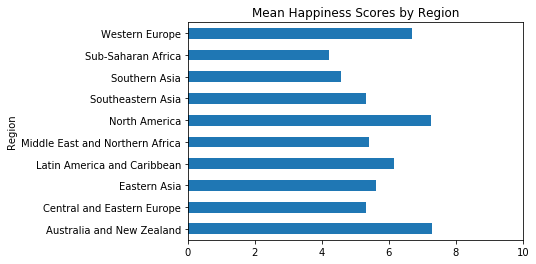

In [58]:
pv_happiness.plot(kind='barh', title = 'Mean Happiness Scores by Region', xlim=(0,10), legend=False)

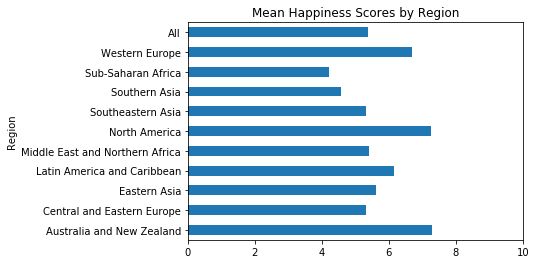

In [59]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True) # gives mean for all regions
pv_happiness.plot(kind='barh', xlim = (0,10), title = 'Mean Happiness Scores by Region', legend = False)

In [60]:
world_mean_happiness = happiness2015['Happiness Score'].mean()
world_mean_happiness

5.3757341772151905

In [61]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [62]:
grouped = happiness2015.groupby('Region')
grouped=grouped[['Family','Happiness Score']]

In [63]:
l=[np.mean,np.max, np.min]
happy_family_stats=grouped.agg(l)
happy_family_stats

Family                   Happiness Score  \
                                     mean     amax     amin            mean   
Region                                                                        
Australia and New Zealand        1.314450  1.31967  1.30923        7.285000   
Central and Eastern Europe       1.053042  1.34043  0.38562        5.332931   
Eastern Asia                     1.099427  1.30060  0.94675        5.626167   
Latin America and Caribbean      1.104720  1.30477  0.74302        6.144682   
Middle East and Northern Africa  0.920490  1.22393  0.47489        5.406900   
North America                    1.284860  1.32261  1.24711        7.273000   
Southeastern Asia                0.940468  1.26504  0.62736        5.317444   
Southern Asia                    0.645321  1.10395  0.30285        4.580857   
Sub-Saharan Africa               0.809085  1.18468  0.00000        4.202800   
Western Europe                   1.247302  1.40223  0.89318        6.689619   

                                               
                                  amax   amin  
Region                                         
Australia and New Zealand        7.286  7.284  
Central and Eastern Europe       6.505  4.218  
Eastern Asia                     6.298  4.874  
Latin America and Caribbean      7.226  4.518  
Middle East and Northern Africa  7.278  3.006  
North America                    7.427  7.119  
Southeastern Asia                6.798  3.819  
Southern Asia                    5.253  3.575  
Sub-Saharan Africa               5.477  2.839  
Western Europe                   7.587  4.857

In [64]:
pv_happy_family_stats=happiness2015.pivot_table(['Family', 'Happiness Score'],'Region', aggfunc=l, margins=True)

In [65]:
pv_happy_family_stats

mean                     amax  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.31967   
Central and Eastern Europe       1.053042        5.332931  1.34043   
Eastern Asia                     1.099427        5.626167  1.30060   
Latin America and Caribbean      1.104720        6.144682  1.30477   
Middle East and Northern Africa  0.920490        5.406900  1.22393   
North America                    1.284860        7.273000  1.32261   
Southeastern Asia                0.940468        5.317444  1.26504   
Southern Asia                    0.645321        4.580857  1.10395   
Sub-Saharan Africa               0.809085        4.202800  1.18468   
Western Europe                   1.247302        6.689619  1.40223   
All                              0.991046        5.375734  1.40223   

                                                    amin                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.286  1.30923           7.284  
Central and Eastern Europe                6.505  0.38562           4.218  
Eastern Asia                              6.298  0.94675           4.874  
Latin America and Caribbean               7.226  0.74302           4.518  
Middle East and Northern Africa           7.278  0.47489           3.006  
North America                             7.427  1.24711           7.119  
Southeastern Asia                         6.798  0.62736           3.819  
Southern Asia                             5.253  0.30285           3.575  
Sub-Saharan Africa                        5.477  0.00000           2.839  
Western Europe                            7.587  0.89318           4.857  
All                                       7.587  0.00000           2.839

## Concatenate

In [66]:
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')

In [67]:
happiness2015['Year']=2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [68]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [69]:
concat_axis0 = pd.concat([head_2015,head_2016], ignore_index=True)

In [70]:
concat_axis1 = pd.concat([head_2015,head_2016], axis = 1)

In [71]:
print(concat_axis0)
print(concat_axis1)

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
3      Denmark            7.526  2016
4  Switzerland            7.509  2016
5      Iceland            7.501  2016
       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


In [72]:
question1= len(concat_axis0.index)
question1

6

## Merge()
### Joining on axis

In [73]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [74]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [75]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [76]:
merged_left= pd.merge(how='left', left=three_2016, right = three_2015, on='Country')
print(merged_left)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


In [77]:
merged_suffixes= pd.merge(how='left', left=three_2015, right = three_2016, on='Country', suffixes=('_2015','_2016'))
print(merged_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


In [78]:
merged_updated_suffixes = pd.merge(how = "left", left=three_2016, right=three_2015, on='Country',suffixes=('_2016','_2015'))

### Joining on index

In [79]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [80]:
merge_index_left = pd.merge(how='left', left = four_2015, right = three_2016,  suffixes=('_2015','_2016'), left_index=True, right_index=True)
rows, columns = merge_index_left.shape

In [81]:
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


## Example on how to use merge/concat

In [82]:
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'}, inplace=True)

In [83]:
combined = pd.concat([happiness2015,happiness2016,happiness2017],axis=0)

C:\Users\pragg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
combined

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.349510,0.665570,0.296780,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.402230,0.628770,0.436300,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.360580,0.649380,0.341390,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.330950,0.669730,0.346990,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.322610,0.632970,0.458110,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015
5,Finland,2.61955,NaN,1.29025,NaN,1.318260,0.641690,0.233510,6.0,7.406,...,NaN,NaN,Western Europe,0.03140,0.41372,NaN,NaN,NaN,NaN,2015
6,Netherlands,2.46570,NaN,1.32944,NaN,1.280170,0.615760,0.476100,7.0,7.378,...,NaN,NaN,Western Europe,0.02799,0.31814,NaN,NaN,NaN,NaN,2015
7,Sweden,2.37119,NaN,1.33171,NaN,1.289070,0.659800,0.362620,8.0,7.364,...,NaN,NaN,Western Europe,0.03157,0.43844,NaN,NaN,NaN,NaN,2015
8,New Zealand,2.26425,NaN,1.25018,NaN,1.319670,0.639380,0.475010,9.0,7.286,...,NaN,NaN,Australia and New Zealand,0.03371,0.42922,NaN,NaN,NaN,NaN,2015
9,Australia,2.26646,NaN,1.33358,NaN,1.309230,0.651240,0.435620,10.0,7.284,...,NaN,NaN,Australia and New Zealand,0.04083,0.35637,NaN,NaN,NaN,NaN,2015


In [85]:
pivot_table_combined=combined.pivot_table('Happiness Score','Year',aggfunc=np.mean)
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


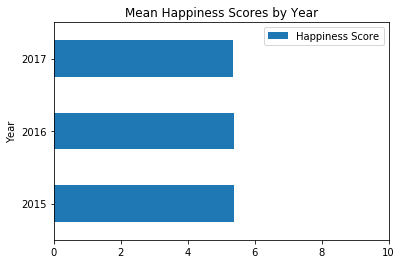

In [86]:
pivot_table_combined.plot(kind='barh', xlim=(0,10), title = 'Mean Happiness Scores by Year')